In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
dataset = pd.read_csv("dataset/top_insta_influencers_data.csv")
dataset.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [115]:
dataset.isnull().sum()

rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

In [116]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [117]:
data = dataset['country'].mode()[0]
data

'United States'

In [118]:
# Replaced the Nan values with most frequent values from the column
dataset['country'] = dataset['country'].fillna("United States")


In [119]:
dataset.isnull().sum()

rank                 0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
country              0
dtype: int64

In [120]:
# Removed the 'rank' column as it is of no use because our target variable is 'influence_score'

dataset.drop(['rank', 'channel_info'], axis=1, inplace=True)
dataset.head()

,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,United States
3,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [121]:
def convert_to_number(value):
    if 'm' in value:
        return float(value.replace('m', ''))
    elif '%' in value:
        return float(value.replace('%', ''))
    elif 'b' in value:
        return float(value.replace('b', ''))
    elif 'k' in value:
        return float(value.replace('k', ''))
    
    else:
        return float(value)

In [122]:
cols_to_convert = ["posts", 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
dataset[cols_to_convert] = dataset[cols_to_convert].map(convert_to_number)

dataset.head()

,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,92,3.30,475.8,8.7,1.39,6.5,29.0,Spain
1,91,6.90,366.2,8.3,1.62,5.9,57.4,United States
2,90,0.89,357.3,6.8,1.24,4.4,6.0,United States
3,93,1.80,342.7,6.2,0.97,3.3,11.5,United States
4,91,6.80,334.1,1.9,0.20,665.3,12.5,United States


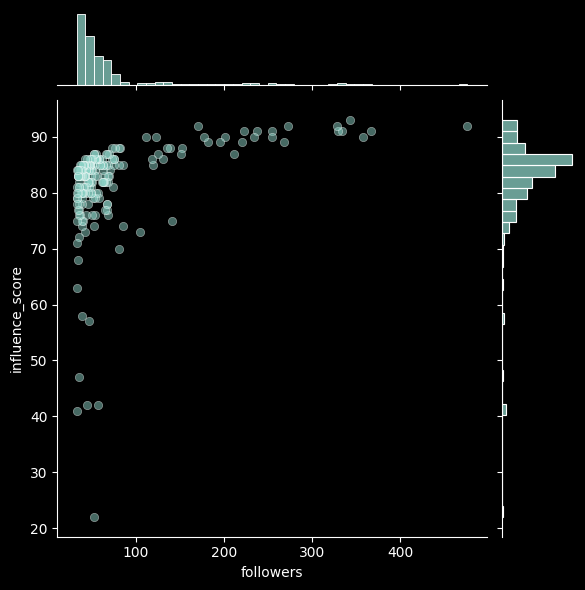

In [127]:
sns.jointplot(x="followers", y="influence_score", data=dataset, alpha=0.5)


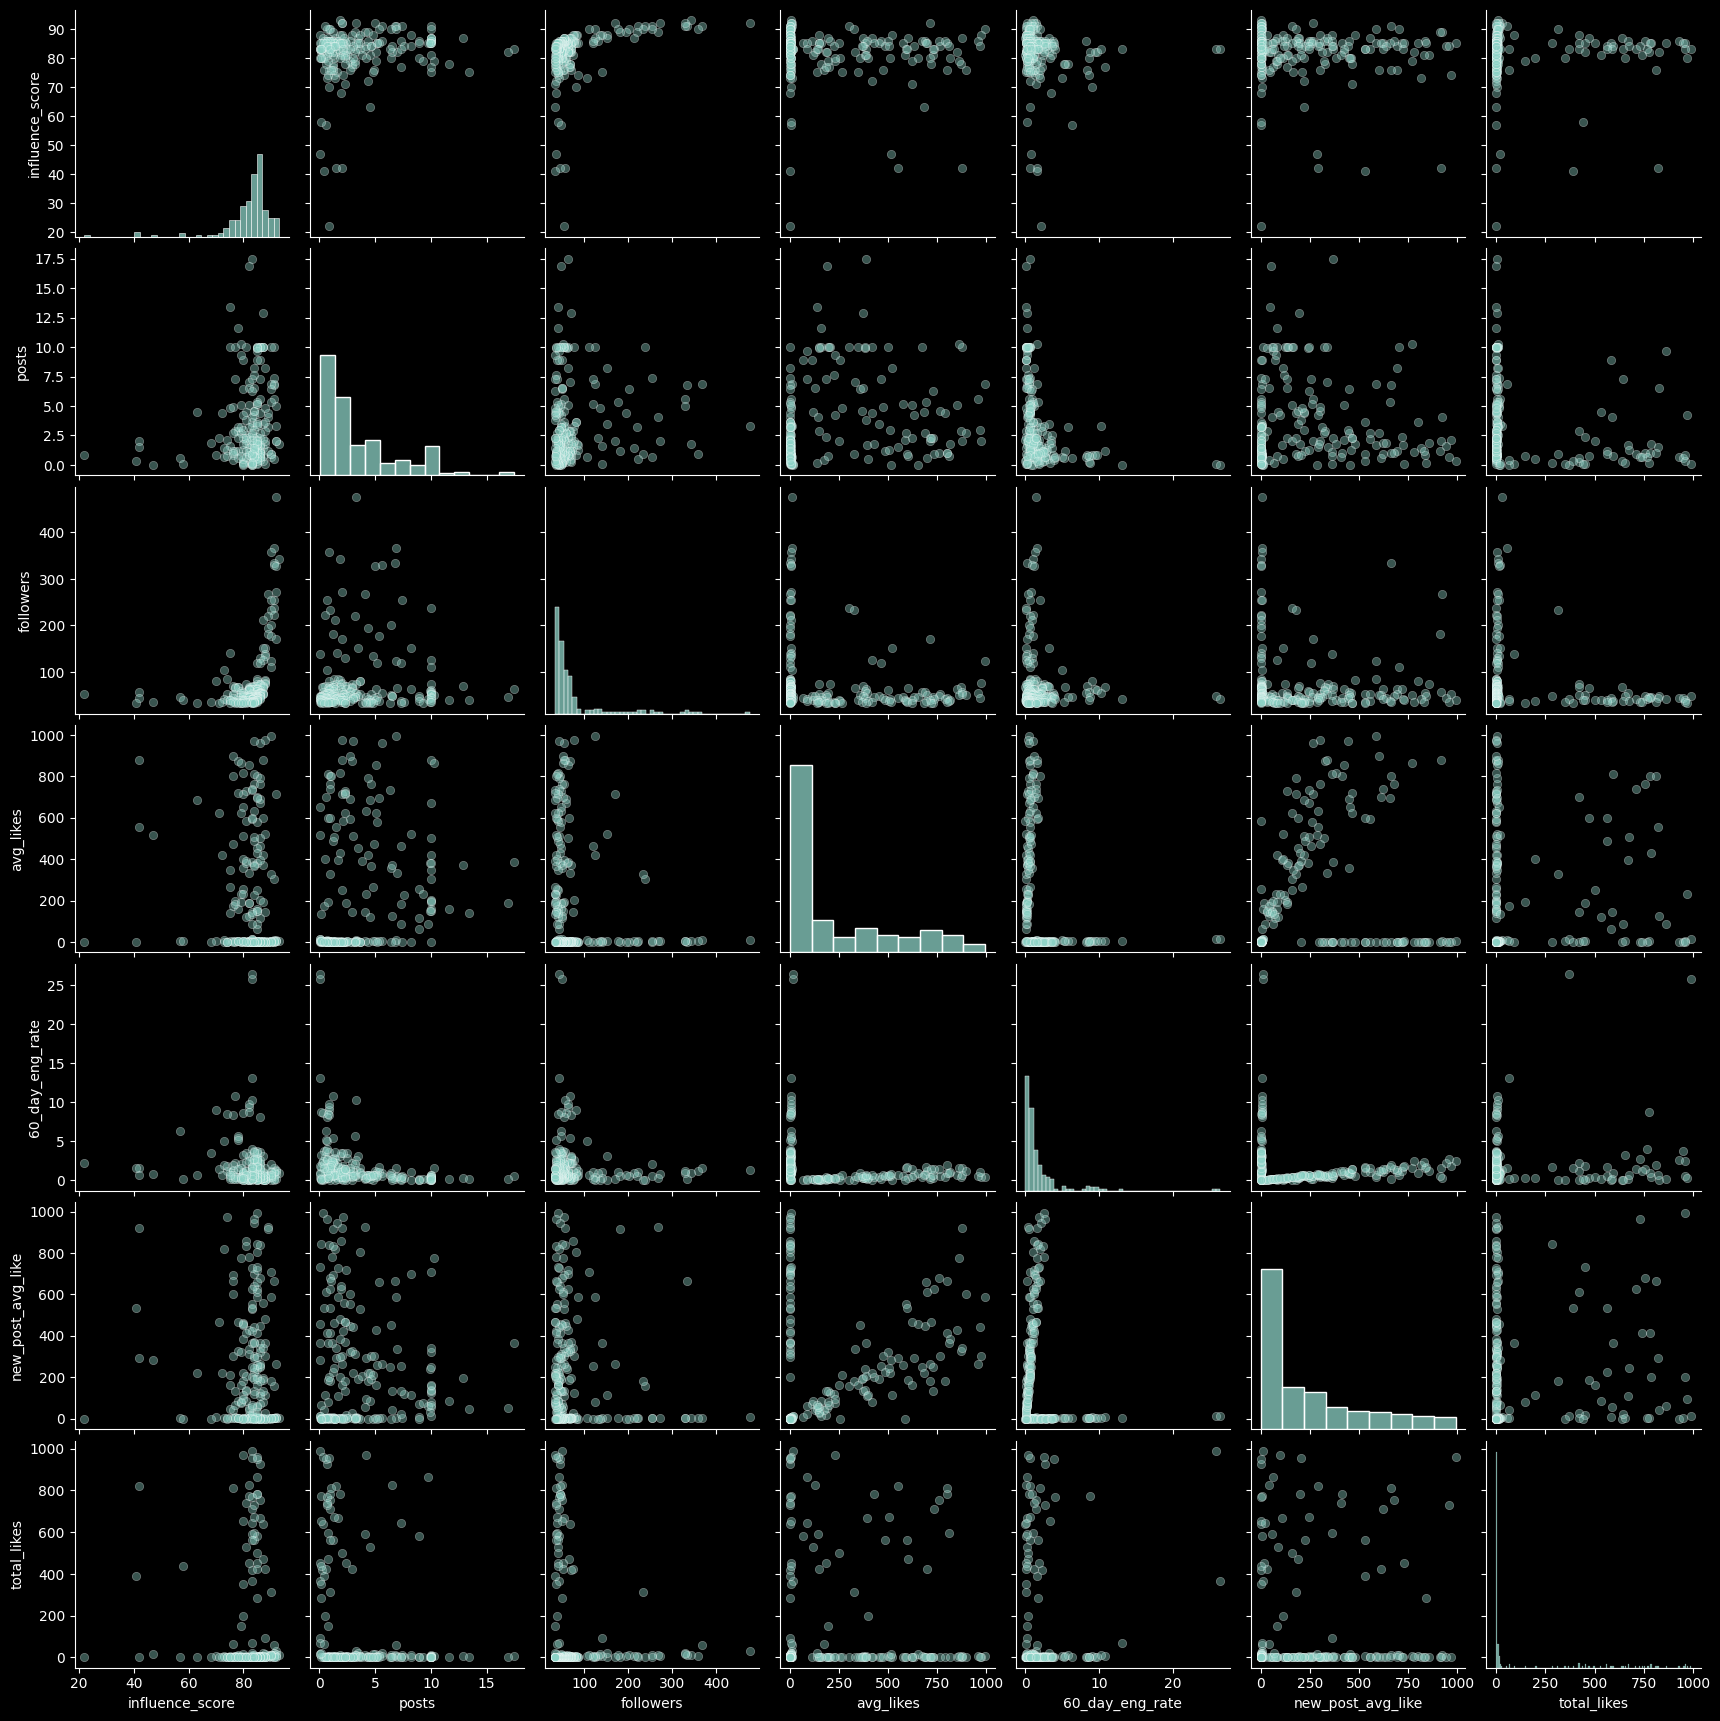

In [128]:
sns.pairplot(dataset, kind="scatter", plot_kws={'alpha': 0.4})